The S1210 airfoil was designed for high lift coefficients at low Reynolds numbers, which seems to be of interest for vertical axis wind turbine applications [1, 2]. A slotted variant for VAWTs was analyzed in a wind tunnel and using CFD [3], where the data for this notebook came from. The experimental data is not really close to the results below (which predict  higher lift and lower drag) nor is the experimental data close to the CFD results in paper. Which, interestingly, predict lower lift and higher drag. Looks like a fully turbulent simulation though.

Regardless, this is an interesting example to show what virtual displacements are good for. They are used to modify smooth geometries to model kinks or otherwise difficult geometries.

In addition, this notebook shows how to interactively plot and show the changes in the solution during the Newton iterations.

<IPython.core.display.Javascript object>


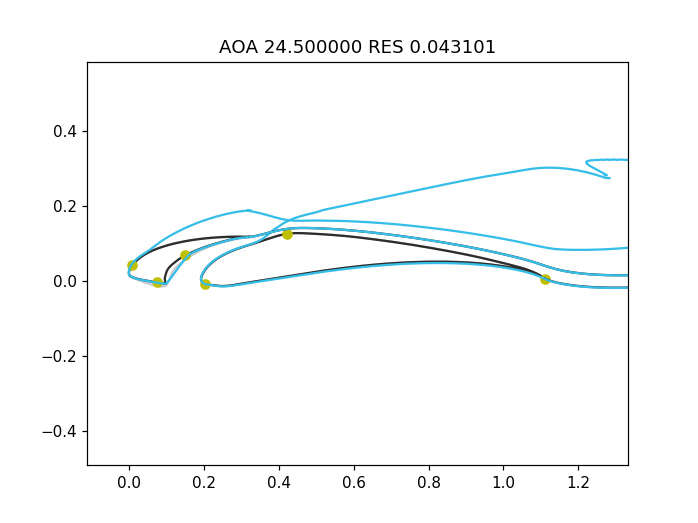

In [1]:
%matplotlib notebook
import viiflow as vf
import viiflowtools.vf_tools as vft
import viiflowtools.vf_plots as vfp
import matplotlib.pyplot as plt
import numpy as np

# Make a plot that will be updated interactively
lines = None
fig,ax = plt.subplots(1,1)

In [2]:
SCALE = 0.9 # Scale Geometry to be comparable to base airfoils
BASE = vft.repanel_spline(vft.read_selig("S1210Base.dat"),160)/SCALE
SLOT = vft.repanel_spline(vft.read_selig("S1210Slot.dat"),160)/SCALE
SLOT0 = vft.read_selig("S1210Slot0.dat")/SCALE # Actual slot shape


# Virtual displacement
[vdSlot,SLOTD] = vft.virtual_displacement_from_geometry(SLOT,SLOT0)
vdSlot[0] = 0.0
vdSlot[-1] = 0.0

AOARANGE = np.arange(10,25,0.5)
#AOARANGE = np.arange(10,-10,-0.5)

# Setup
RE = 100000
ncrit = 5
Mach = 0.0
AOA0 = AOARANGE[0]
s = vf.setup(Re=RE,Ma=Mach,ncrit=ncrit,alpha=AOA0)
s.iterate_wakes = False
s.itermax = 1
s.silent = True
s.pitch_rate = 0*90*np.pi/180*0.67/15
#s.pitch_rate = -90*np.pi/180*0.67/15

BASE[1,:]-=.5
SLOT[1,:]-=.5

# Set-up and initialize based on inviscid panel solution
(p,bl,x) = vf.init([BASE,SLOT],s)

xn = x.copy()
alv = []
clv = []
cdv = []

#vfp.plot_geometry(ax,[BASE,SLOT,p.wakes[0].X,p.wakes[1].X],lines,
#                    [bl[0].bl_fl.nodes.delta,bl[1].bl_fl.nodes.delta,-bl[0].bl_wk.nodes.delta,-bl[1].bl_wk.nodes.delta],
#                    [None,vdSlot,None,None])
#error()
for alpha in AOARANGE:
    s.alpha = alpha
    res = None
    grad = None
    for k in range(int(100/s.itermax)): # Make effectively 100 iterations, but show some in between
        [xn,flag,res,grad,_] = vf.iter(xn,bl,p,s,res,grad,[None,vdSlot])
        # Plot geometry
        lines = vfp.plot_geometry(ax,p,bl,lines)
        nres=np.sqrt(np.dot(res.T,res))
        title = "AOA %f RES %f"%(alpha,nres)
        ax.set_title(title)
        #ax.set_xlim([-.1,2.7])
        fig.canvas.draw()
        if nres<2e-3:
            alv.append(alpha)
            clv.append(p.CL)
            cdv.append(bl[0].CD+bl[1].CD)
            print('AL: %f CL: %f CD: %f' % (alpha,clv[-1],cdv[-1]) ) 
            break


AL: 10.000000 CL: 2.116061 CD: 0.045477
AL: 10.500000 CL: 2.167545 CD: 0.046981
AL: 11.000000 CL: 2.216686 CD: 0.048680
AL: 11.500000 CL: 2.267625 CD: 0.050459
AL: 12.500000 CL: 2.363105 CD: 0.053603
AL: 13.000000 CL: 2.410793 CD: 0.055579
AL: 13.500000 CL: 2.456920 CD: 0.057630
AL: 14.000000 CL: 2.504263 CD: 0.059984
AL: 14.500000 CL: 2.550131 CD: 0.062797
AL: 15.000000 CL: 2.596655 CD: 0.067007
AL: 15.500000 CL: 2.641196 CD: 0.072527
AL: 16.000000 CL: 2.689418 CD: 0.079920
AL: 16.500000 CL: 2.739470 CD: 0.087681
AL: 17.000000 CL: 2.788764 CD: 0.095787
AL: 17.500000 CL: 2.833448 CD: 0.103590
AL: 18.000000 CL: 2.866027 CD: 0.114373
AL: 18.500000 CL: 2.897287 CD: 0.125309
AL: 19.000000 CL: 2.914018 CD: 0.136616
AL: 19.500000 CL: 2.922348 CD: 0.149824
AL: 20.000000 CL: 2.913984 CD: 0.166695
AL: 20.500000 CL: 2.885812 CD: 0.191888


AL: 22.000000 CL: 2.296305 CD: 0.304310


<IPython.core.display.Javascript object>


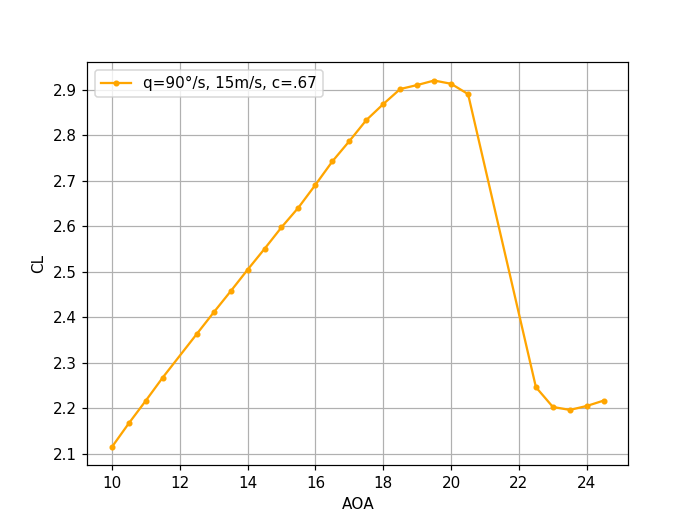

<IPython.core.display.Javascript object>


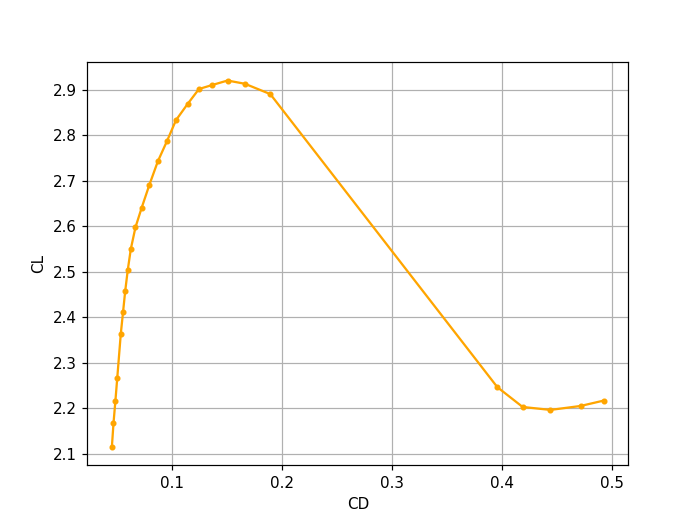

In [3]:
# Make a new plot with the results
fig,ax = plt.subplots(1,1)
ax.plot(alv,clv,marker=".",color="orange")
#ax.plot(backup[0],backup[1],marker=".")
#ax.plot(backup_pitch1[0],backup_pitch1[1],marker=".",color="orange")
ax.set_xlabel('AOA')
ax.set_ylabel('CL')
ax.legend(['q=90°/s, 15m/s, c=.67','q=0°/s'])
ax.grid(1)
fig,ax = plt.subplots(1,1)
ax.plot(cdv,clv,marker=".",color="orange")
#ax.plot(backup[2],backup[1],marker=".")
#ax.plot(backup_pitch1[2],backup_pitch1[1],marker=".",color="orange")
ax.set_xlabel('CD')
ax.set_ylabel('CL');
#ax.legend(['q=0°/s','q=90°/s, 15m/s, c=.67'])
ax.grid(1)

In [ ]:
backup=[alv.copy(),clv.copy(),cdv.copy()]

In [6]:
type(s) is type(vf.setup())

True

[1] Islam, Mazharul, et al. *Investigation of low reynolds number airfoils for fixed-pitch straight-bladed VAWT.* 47th AIAA Aerospace Sciences Meeting including The New Horizons Forum and Aerospace Exposition. 2009.

[2] Singh, M. A., A. Biswas, and R. D. Misra. *Investigation of self-starting and high rotor solidity on the performance of a three S1210 blade H-type Darrieus rotor.* Renewable energy 76 (2015): 381-387.

[3] Chougule, Prasad, and Søren RK Nielsen. *Simulation of flow over double-element airfoil and wind tunnel test for use in vertical axis wind turbine.* Journal of Physics: Conference Series. Vol. 524. No. 1. IOP Publishing, 2014.